In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df=pd.read_csv('zomato.csv',encoding='latin-1')
df.head()


,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [8]:
df_sample=df.sample(frac=0.5,random_state=23)

In [9]:
df_sample.shape

(4776, 21)

In [3]:
df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

In [4]:
df.shape

(9551, 21)

In [6]:
df.Currency.unique()

array(['Botswana Pula(P)', 'Brazilian Real(R$)', 'Dollar($)',
       'Emirati Diram(AED)', 'Indian Rupees(Rs.)',
       'Indonesian Rupiah(IDR)', 'NewZealand($)', 'Pounds(\x8c£)',
       'Qatari Rial(QR)', 'Rand(R)', 'Sri Lankan Rupee(LKR)',
       'Turkish Lira(TL)'], dtype=object)

In [8]:
df['Restaurant Name'][df['Currency']=='Dollar($)'].shape

(482,)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [5]:
df.describe()

,Restaurant ID,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
count,9.551000e+03,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000
mean,9.051128e+06,18.365616,64.126574,25.854381,1199.210763,1.804837,2.666370,156.909748
std,8.791521e+06,56.750546,41.467058,11.007935,16121.183073,0.905609,1.516378,430.169145
min,5.300000e+01,1.000000,-157.948486,-41.330428,0.000000,1.000000,0.000000,0.000000
25%,3.019625e+05,1.000000,77.081343,28.478713,250.000000,1.000000,2.500000,5.000000
50%,6.004089e+06,1.000000,77.191964,28.570469,400.000000,2.000000,3.200000,31.000000
75%,1.835229e+07,1.000000,77.282006,28.642758,700.000000,2.000000,3.700000,131.000000
max,1.850065e+07,216.000000,174.832089,55.976980,800000.000000,4.000000,4.900000,10934.000000


In [6]:
df.shape

(9551, 21)

In [7]:
df.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

In [8]:
# df.Cuisines.value_counts()
df.rename(columns={'Rating color':'Rating_color', 'Rating text': 'Rating_text'},inplace=True)

In [9]:
df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating_color', 'Rating_text',
       'Votes'],
      dtype='object')

In [10]:
# df.Rating_text.unique()
df['Rating_text'].value_counts()

Average      3737
Not rated    2148
Good         2100
Very Good    1079
Excellent     301
Poor          186
Name: Rating_text, dtype: int64

In [20]:
## Find all those records that has Rating_text = 'Excellent'

pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns',None)


# df[df['Rating_text'] == 'Excellent'].shape

## Find the Name of all the restaurants having Poor rating?

df['Restaurant Name'][df['Rating_text']=='Poor']

312                              Troll Tavern
344                       Triangle Restaurant
348                                Poets Cafe
613                                 Pizza Hut
890                                       KFC
896                         Mirage Restro Bar
1138                            Pind Balluchi
1247                         The Wine Company
1263                           Domino's Pizza
1278                Sugar & Spice - Le Marche
1296                                      KFC
1395                                    Aahar
1396                            Chicken Bytes
1397                             Flying Cakes
1398                            Punjabi Tadka
1549                                  Green's
1550                                New Zaika
1582                            Chicago Pizza
1583                    Suburbia - The Empire
1584                           Viva Hyderabad
1629                       Pizza Hut Delivery
1631                           Dom

In [21]:
# [features for features in df.columns if df[features].isnull().sum()>0]

# [column_name for column_name in df.columns if df[column_name].isnull().sum()==0]
df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating_color', 'Rating_text',
       'Votes'],
      dtype='object')

# Data Integration

In [22]:
df_country = pd.read_excel('Country-Code.xlsx')
df_country.head()

,Country Code,Country
0,1,India
1,14,Australia
2,30,Brazil
3,37,Canada
4,94,Indonesia


In [23]:
df_country.columns

Index(['Country Code', 'Country'], dtype='object')

In [24]:
df_country.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Country Code  15 non-null     int64 
 1   Country       15 non-null     object
dtypes: int64(1), object(1)
memory usage: 368.0+ bytes


In [25]:
df_country.shape

(15, 2)

In [26]:
final_df = pd.merge(df,df_country,on='Country Code',how='left')
final_df.head(2)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating_color,Rating_text,Votes,Country
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",1100,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314,Phillipines
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,1200,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591,Phillipines


In [9]:
final_df.index

NameError: name 'final_df' is not defined

In [17]:
final_df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating_color', 'Rating_text',
       'Votes', 'Country'],
      dtype='object')

In [18]:
final_df.shape

(9551, 22)

In [19]:
final_df.dtypes

Restaurant ID             int64
Restaurant Name          object
Country Code              int64
City                     object
Address                  object
Locality                 object
Locality Verbose         object
Longitude               float64
Latitude                float64
Cuisines                 object
Average Cost for two      int64
Currency                 object
Has Table booking        object
Has Online delivery      object
Is delivering now        object
Switch to order menu     object
Price range               int64
Aggregate rating        float64
Rating_color             object
Rating_text              object
Votes                     int64
Country                  object
dtype: object

In [28]:
final_df.corr()

,Restaurant ID,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
Restaurant ID,1.000000,0.148471,-0.226081,-0.052081,-0.001693,-0.134540,-0.326212,-0.147023
Country Code,0.148471,1.000000,-0.698299,0.019792,0.043225,0.243327,0.282189,0.154530
Longitude,-0.226081,-0.698299,1.000000,0.043207,0.045891,-0.078939,-0.116818,-0.085101
Latitude,-0.052081,0.019792,0.043207,1.000000,-0.111088,-0.166688,0.000516,-0.022962
Average Cost for two,-0.001693,0.043225,0.045891,-0.111088,1.000000,0.075083,0.051792,0.067783
Price range,-0.134540,0.243327,-0.078939,-0.166688,0.075083,1.000000,0.437944,0.309444
Aggregate rating,-0.326212,0.282189,-0.116818,0.000516,0.051792,0.437944,1.000000,0.313691
Votes,-0.147023,0.154530,-0.085101,-0.022962,0.067783,0.309444,0.313691,1.000000


In [29]:
final_df.Country.unique()

array(['Phillipines', 'Brazil', 'United States', 'Australia', 'Canada',
       'Singapore', 'UAE', 'India', 'Indonesia', 'New Zealand',
       'United Kingdom', 'Qatar', 'South Africa', 'Sri Lanka', 'Turkey'],
      dtype=object)

In [30]:
final_df.Country.value_counts()

India             8652
United States      434
United Kingdom      80
Brazil              60
UAE                 60
South Africa        60
New Zealand         40
Turkey              34
Australia           24
Phillipines         22
Indonesia           21
Singapore           20
Qatar               20
Sri Lanka           20
Canada               4
Name: Country, dtype: int64

In [32]:
country_val = final_df.Country.value_counts().values
country_val

array([8652,  434,   80,   60,   60,   60,   40,   34,   24,   22,   21,
         20,   20,   20,    4])

In [34]:
country_names = final_df.Country.value_counts().index
country_names

Index(['India', 'United States', 'United Kingdom', 'Brazil', 'UAE',
       'South Africa', 'New Zealand', 'Turkey', 'Australia', 'Phillipines',
       'Indonesia', 'Singapore', 'Qatar', 'Sri Lanka', 'Canada'],
      dtype='object')

([<matplotlib.patches.Wedge at 0x7fddfd9a26a0>,
 [Text(-1.0829742700952103, 0.19278674827836725, 'India'),
  Text(1.077281715838356, -0.22240527134123297, 'United States'),
  Text(1.0995865153823035, -0.03015783794312073, 'United Kingdom')],
 [Text(-0.590713238233751, 0.10515640815183668, '94.4%'),
  Text(0.5876082086391032, -0.12131196618612707, '4.7%'),
  Text(0.5997744629358018, -0.01644972978715676, '0.9%')])

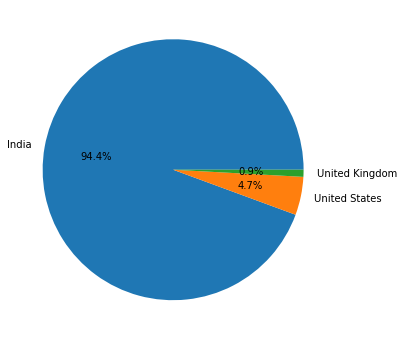

In [43]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = (12, 6)

plt.pie(country_val[:3],labels=country_names[:3],autopct='%1.1f%%')


In [67]:
final_df.groupby(['Aggregate rating','Rating_color','Rating_text']).size().reset_index()

,Aggregate rating,Rating_color,Rating_text,0
0,0.0,White,Not rated,2148
1,1.8,Red,Poor,1
2,1.9,Red,Poor,2
3,2.0,Red,Poor,7
4,2.1,Red,Poor,15
5,2.2,Red,Poor,27
6,2.3,Red,Poor,47
7,2.4,Red,Poor,87
8,2.5,Orange,Average,110
9,2.6,Orange,Average,191


In [51]:
### Find the countries name that has given 0 rating 
# final_df['Country'][final_df.groupby(['Aggregate rating','Rating_color','Rating_text']).size()[0]] # wrong
# final_df.groupby(['Aggregate rating','Country','Rating_text']).size() #wrong
# final_df.groupby(['Aggregate rating','Country']).size()[0] #wrong
final_df['Country'][final_df['Aggregate rating']==0.0].unique()


array(['Brazil', 'United States', 'India', 'United Kingdom'], dtype=object)

In [54]:
### Find the countries name that has given 0 rating 
# final_df[final_df['Rating_color']=='White'].groupby('Country').size().reset_index()
final_df.groupby(['Aggregate rating','Country']).size().reset_index().head(5)

,Aggregate rating,Country,0
0,0.0,Brazil,5
1,0.0,India,2139
2,0.0,United Kingdom,1
3,0.0,United States,3
4,1.8,India,1


In [55]:
##find out which currency is used by which country?
final_df.groupby(['Country','Currency']).size()

Country         Currency              
Australia       Dollar($)                   24
Brazil          Brazilian Real(R$)          60
Canada          Dollar($)                    4
India           Indian Rupees(Rs.)        8652
Indonesia       Indonesian Rupiah(IDR)      21
New Zealand     NewZealand($)               40
Phillipines     Botswana Pula(P)            22
Qatar           Qatari Rial(QR)             20
Singapore       Dollar($)                   20
South Africa    Rand(R)                     60
Sri Lanka       Sri Lankan Rupee(LKR)       20
Turkey          Turkish Lira(TL)            34
UAE             Emirati Diram(AED)          60
United Kingdom  Pounds(£)                  80
United States   Dollar($)                  434
dtype: int64

In [59]:
## Which Countries do have online deliveries option
# final_df['Country'][final_df['Has Online delivery']=='Yes'].value_counts()


Country         Has Online delivery
Australia       No                       24
Brazil          No                       60
Canada          No                        4
India           No                     6229
                Yes                    2423
Indonesia       No                       21
New Zealand     No                       40
Phillipines     No                       22
Qatar           No                       20
Singapore       No                       20
South Africa    No                       60
Sri Lanka       No                       20
Turkey          No                       34
UAE             No                       32
                Yes                      28
United Kingdom  No                       80
United States   No                      434
dtype: int64

In [62]:
## Find the top 10 cuisines
# final_df[:10].groupby(['Votes']).sum() #wrong
final_df['Cuisines'][final_df['Votes'].value_counts()][0:10]


1094    Mithai, Street Food, Chinese
483                            Pizza
327       Burger, Desserts, Bar Food
244                         American
207         American, Seafood, Steak
168      American, Breakfast, Burger
164                         American
154                            Pizza
135     Mexican, Southwestern, Sushi
134      Bar Food, Sandwich, Seafood
Name: Cuisines, dtype: object

In [65]:
# final_df[:10].groupby(['Votes','Cuisines']).sum()
final_df[:10].groupby(['Votes','Cuisines']).size()

Votes  Cuisines                          
229    Japanese, Korean                      1
270    Seafood, Asian, Filipino, Indian      1
314    French, Japanese, Desserts            1
336    Chinese                               1
365    Japanese, Sushi                       1
520    Asian, European                       1
532    Filipino                              1
591    Japanese                              1
621    European, Asian, Indian               1
677    Seafood, Filipino, Asian, European    1
dtype: int64

In [69]:
ratings=final_df.groupby(['Aggregate rating','Rating_color','Rating_text']).size().reset_index().rename(columns={0:'Rating Count'})

In [70]:
ratings

,Aggregate rating,Rating_color,Rating_text,Rating Count
0,0.0,White,Not rated,2148
1,1.8,Red,Poor,1
2,1.9,Red,Poor,2
3,2.0,Red,Poor,7
4,2.1,Red,Poor,15
5,2.2,Red,Poor,27
6,2.3,Red,Poor,47
7,2.4,Red,Poor,87
8,2.5,Orange,Average,110
9,2.6,Orange,Average,191


<AxesSubplot:xlabel='Aggregate rating', ylabel='Rating Count'>

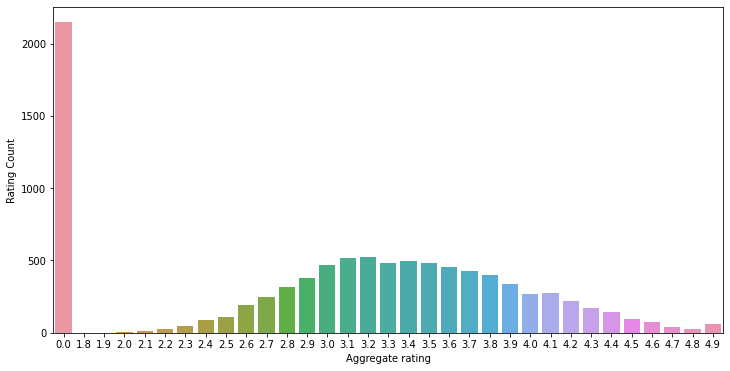

In [71]:
sns.barplot(x="Aggregate rating",y="Rating Count",data=ratings)

<AxesSubplot:xlabel='Aggregate rating', ylabel='Rating Count'>

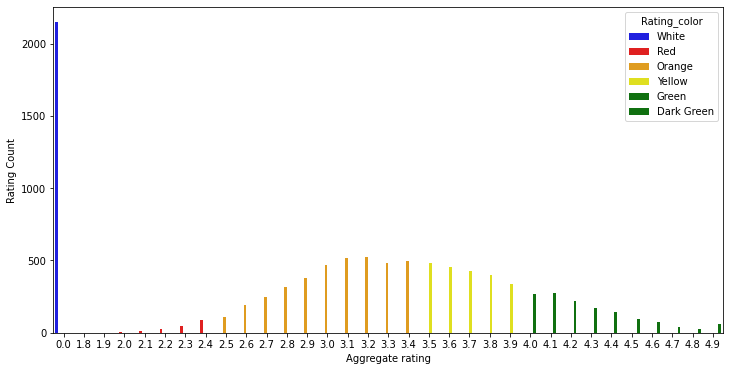

In [73]:
sns.barplot(x="Aggregate rating",y="Rating Count",hue='Rating_color',data=ratings,palette=['blue','red','orange','yellow','green','green'])

In [106]:
# sns.countplot(x="Rating color",data=ratings,palette=['blue','red','orange','yellow','green','green'])

In [108]:
##find out which currency is used by which country?
# final_df.columns

In [109]:
# final_df[['Country','Currency']].groupby(['Country','Currency']).size().reset_index()

In [110]:
## Which Countries do have online deliveries option
# final_df[final_df['Has Online delivery'] =="Yes"].Country.value_counts()
# final_df[['Has Online delivery','Country']].groupby(['Has Online delivery','Country']).size().reset_index()

In [55]:
## Create a pie chart for top 5 cities distribution

In [111]:
## Find the top 10 cuisines
# final_df.columns

In [75]:
# final_df[['Cuisines','Rating text']][final_df['Rating text']=='Excellent'].reset_index().head(10)
